# Introduction to FEM

_Prepared by Gustavo Anjos and Gustavo Oliveira_

## 2D shape functions

This code is an interactive version of the script `triAreaFunction.py`, to compute the shape functions for the triangular finite element used by the following elements:

- mini element
- quadratic element
- mini element (incomplete cubic)

In [4]:
# plotting
%matplotlib inline

In [5]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

In [59]:
# functions 

def setMesh(_Lx,_Ly,_nX,_nY):
    """ 
    Define a regular grid (triangular mesh) where _Lx and _Ly are the limits of
    the 2D domain and _nX and _nY are the number of the desired grid nodes in the 
    direction
    """
    dx = _Lx/(_nX-1.0);
    dy = _Ly/(_nY-1.0);
    global numVerts
    numVerts = _nX*_nY;
    global X,Y
    X = np.zeros((numVerts),dtype=float)
    Y = np.zeros((numVerts),dtype=float)

    count = 0
    for i in range(0,_nX):
        for j in range(0,_nY):
            X[count] = i*dx 
            Y[count] = j*dx 
            count += 1

def setTriangle(_triangle):
    """
    Using the regular grid, this method removes all the nodes outside a defined
    triangle, keeping nodes only inside the triangle.
    """

    global X,Y,numVerts
    p1x = _triangle[0]; p1y = _triangle[1] 
    p2x = _triangle[2]; p2y = _triangle[3] 
    p3x = _triangle[4]; p3y = _triangle[5] 
    
    A = (1.0/2.0)*np.linalg.det([[p1x, p1y, 1], [p2x, p2y, 1], [p3x, p3y, 1]])
    vert = []
    for i in range(0,numVerts):
        px = X[i]
        py = Y[i]
        A1 = (1.0/2.0)*np.linalg.det([[px, py, 1], [p2x, p2y, 1], [p3x, p3y, 1]])
        A2 = (1.0/2.0)*np.linalg.det([[p3x, p3y, 1], [p1x, p1y, 1], [px, py, 1]])
        A3 = (1.0/2.0)*np.linalg.det([[p1x, p1y, 1], [p2x, p2y, 1], [px, py, 1]])

        if A1/A < 0.0 or A2/A < 0.0 or A3/A < 0.0:
            #print('node {0:d} ({1:g},{2:g}) is out'.format(i,px,py))        
            vert += [i]
            numVerts -= 1

    # removing undesired nodes
    X = np.delete(X,vert)
    Y = np.delete(Y,vert)


def plotAreaFuncLinear(_triangle):
    """
    Plot the surfaces of the shape functions for the linear element
    """
    
    global X,Y,Z,numVerts    
    p1x = _triangle[0]; p1y = _triangle[1] 
    p2x = _triangle[2]; p2y = _triangle[3] 
    p3x = _triangle[4]; p3y = _triangle[5] 
    N1 = np.zeros((numVerts),dtype=float)
    N2 = np.zeros((numVerts),dtype=float)
    N3 = np.zeros((numVerts),dtype=float)
    
    A = (1.0/2.0)*np.linalg.det([[p1x, p1y, 1], [p2x, p2y, 1], [p3x, p3y, 1]])
    vert = []
    for i in range(0,numVerts):
        px = X[i]; py = Y[i]
        A1 = (1.0/2.0)*np.linalg.det([[px, py, 1], [p2x, p2y, 1], [p3x, p3y, 1]])
        A2 = (1.0/2.0)*np.linalg.det([[p3x, p3y, 1], [p1x, p1y, 1], [px, py, 1]])
        A3 = (1.0/2.0)*np.linalg.det([[p1x, p1y, 1], [p2x, p2y, 1], [px, py, 1]])
        L1 = A1/A 
        L2 = A2/A 
        L3 = A3/A 
        N1[i] = L1
        N2[i] = L2
        N3[i] = L3

    # Plot 3D
    TRI = mtri.Triangulation(X, Y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(X, Y, N1, triangles=TRI.triangles, color='g',label='L1')
    ax.plot_trisurf(X, Y, N2, triangles=TRI.triangles, color='b',label='L1')
    ax.plot_trisurf(X, Y, N3, triangles=TRI.triangles, color='r',label='L1')
    ax.set_xlabel('X')
    ax.set_xlim(0, 1)
    ax.set_ylabel('Y')
    ax.set_ylim(0, 1)
    ax.set_zlabel('Z')
    ax.set_zlim(0, 1)
    #plt.show()
    
    return fig

def plotAreaFuncQuadratic(_triangle):
    """
    Plot the surfaces of the shape functions for the quadratic element
    """
    
    global X,Y,Z,numVerts
    p1x = _triangle[0]; p1y = _triangle[1] 
    p2x = _triangle[2]; p2y = _triangle[3] 
    p3x = _triangle[4]; p3y = _triangle[5] 
    N1 = np.zeros((numVerts),dtype=float)
    N2 = np.zeros((numVerts),dtype=float)
    N3 = np.zeros((numVerts),dtype=float)
    N4 = np.zeros((numVerts),dtype=float)
    N5 = np.zeros((numVerts),dtype=float)
    N6 = np.zeros((numVerts),dtype=float)
    
    A = (1.0/2.0)*np.linalg.det([[p1x, p1y, 1], [p2x, p2y, 1], [p3x, p3y, 1]])
    vert = []
    
    for i in range(0,numVerts):
        px = X[i]; py = Y[i]
        A1 = (1.0/2.0)*np.linalg.det([[px, py, 1], [p2x, p2y, 1], [p3x, p3y, 1]])
        A2 = (1.0/2.0)*np.linalg.det([[p3x, p3y, 1], [p1x, p1y, 1], [px, py, 1]])
        A3 = (1.0/2.0)*np.linalg.det([[p1x, p1y, 1], [p2x, p2y, 1], [px, py, 1]])
        L1 = A1/A 
        L2 = A2/A 
        L3 = A3/A 
        N1[i] = L1*(2.0*L1-1.0)
        N2[i] = L2*(2.0*L2-1.0)
        N3[i] = L3*(2.0*L3-1.0)
        N4[i] = 4.0*L1*L2
        N5[i] = 4.0*L2*L3
        N6[i] = 4.0*L1*L3
    
    # Plot 3D
    TRI = mtri.Triangulation(X, Y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(X, Y, N1, triangles=TRI.triangles, color='green',label='N1')
    ax.plot_trisurf(X, Y, N2, triangles=TRI.triangles, color='blue',label='N2')
    ax.plot_trisurf(X, Y, N3, triangles=TRI.triangles, color='red',label='N3')
    ax.plot_trisurf(X, Y, N4, triangles=TRI.triangles, color='yellow',label='N4')
    ax.plot_trisurf(X, Y, N5, triangles=TRI.triangles, color='coral',label='N5')
    ax.plot_trisurf(X, Y, N6, triangles=TRI.triangles, color='beige',label='N6')
    ax.set_xlabel('X')
    ax.set_xlim(0, 1)
    ax.set_ylabel('Y')
    ax.set_ylim(0, 1)
    ax.set_zlabel('Z')
    ax.set_zlim(0, 1)
    #plt.show()

def plotAreaFuncBubble(_triangle):
    """
    plot the surfaces of the shape functions for the mini element
    """
    global X,Y,Z,numVerts
    p1x = _triangle[0]; p1y = _triangle[1] 
    p2x = _triangle[2]; p2y = _triangle[3] 
    p3x = _triangle[4]; p3y = _triangle[5] 
    N1 = np.zeros((numVerts),dtype=float)
    N2 = np.zeros((numVerts),dtype=float)
    N3 = np.zeros((numVerts),dtype=float)
    N4 = np.zeros((numVerts),dtype=float)
    
    A = (1.0/2.0)*np.linalg.det([[p1x, p1y, 1], [p2x, p2y, 1], [p3x, p3y, 1]])
    vert = []
    for i in range(0,numVerts):
        px = X[i]; py = Y[i]
        A1 = (1.0/2.0)*np.linalg.det([[px, py, 1], [p2x, p2y, 1], [p3x, p3y, 1]])
        A2 = (1.0/2.0)*np.linalg.det([[p3x, p3y, 1], [p1x, p1y, 1], [px, py, 1]])
        A3 = (1.0/2.0)*np.linalg.det([[p1x, p1y, 1], [p2x, p2y, 1], [px, py, 1]])
        L1 = A1/A 
        L2 = A2/A 
        L3 = A3/A 
        N1[i] = L1-9.0*L1*L2*L3
        N2[i] = L2-9.0*L1*L2*L3
        N3[i] = L3-9.0*L1*L2*L3
        N4[i] =27.0*L1*L2*L3

    # Plot 3D
    TRI = mtri.Triangulation(X, Y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(X, Y, N1, triangles=TRI.triangles, color='g',label='N1')
    ax.plot_trisurf(X, Y, N2, triangles=TRI.triangles, color='b',label='N2')
    ax.plot_trisurf(X, Y, N3, triangles=TRI.triangles, color='r',label='N3')
    ax.plot_trisurf(X, Y, N4, triangles=TRI.triangles, color='y',label='N4')
    ax.set_xlabel('X')
    ax.set_xlim(0, 1)
    ax.set_ylabel('Y')
    ax.set_ylim(0, 1)
    ax.set_zlabel('Z')
    ax.set_zlim(0, 1)
    #plt.show()

In [28]:
# define global variables
global X,Y,numVerts

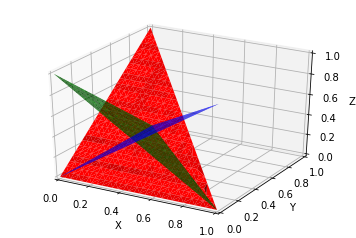

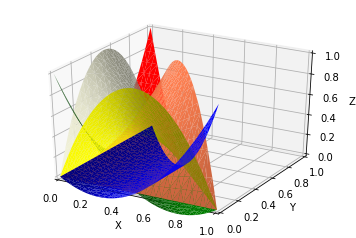

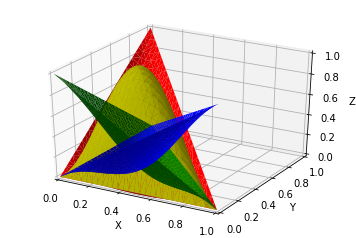

In [29]:
# main execution 

#triangle=[0,0,1,1,0,1]
triangle=[0,0,1,0,0,1]
#triangle=[0.3,0.3,0.9,0.4,0.5,0.8]
#triangle=[0.3,0.3,0.9,0.4,0.5,0.8]

setMesh(1,1,30,30)
setTriangle(triangle)
plotAreaFuncLinear(triangle)
plotAreaFuncQuadratic(triangle)
plotAreaFuncBubble(triangle)

In [ ]:
# For offline plotly

# Version checking 
#from plotly import __version__
#print(__version__) # requires version >= 1.9.0

#
#import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import plotly.tools as tls
#init_notebook_mode(connected=True)


#convert matplotlib figures into Plotly figure objects
#F = plt.plot(...)
#plotly_fig = tls.mpl_to_plotly(F)
#iplot(plotly_fig)

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()